In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
data_train = pd.read_csv('./merge.csv')
data_test_a = pd.read_csv('./test/test_merge.csv')

In [251]:
data_test_a.shape

(5000, 24)

In [252]:
data_train.shape

(10000, 25)

In [253]:
# #优化空间复杂度
# def reduce_mem_usage(df):
#     start_mem = df.memory_usage().sum() 
#     print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
#     for col in df.columns:
#         col_type = df[col].dtype
        
#         if col_type != object:
#             c_min = df[col].min()
#             c_max = df[col].max()
#             if str(col_type)[:3] == 'int':
#                 if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
#                     df[col] = df[col].astype(np.int8)
#                 elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
#                     df[col] = df[col].astype(np.int16)
#                 elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
#                     df[col] = df[col].astype(np.int32)
#                 elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
#                     df[col] = df[col].astype(np.int64)  
#             else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
#                     df[col] = df[col].astype(np.float32)
#                 else:
#                     df[col] = df[col].astype(np.float64)
#         else:
#             df[col] = df[col].astype('category')

#     end_mem = df.memory_usage().sum() 
#     print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
#     print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

In [254]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cust_id               10000 non-null  object 
 1   label                 10000 non-null  int64  
 2   sex                   10000 non-null  int64  
 3   address               10000 non-null  float64
 4   birthDT               10000 non-null  float64
 5   apply_amount          10000 non-null  float64
 6   apply_dateDT          10000 non-null  float64
 7   credit_actual_dt      10000 non-null  float64
 8   credit_mat_dt         10000 non-null  float64
 9   credit_lmt            10000 non-null  float64
 10  credit_term           10000 non-null  float64
 11  to_credit_lmt         10000 non-null  float64
 12  to_credit_term        10000 non-null  float64
 13  draw_amt              10000 non-null  float64
 14  in_pay_amt            10000 non-null  float64
 15  loan_used_rate      

In [255]:
data_test_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cust_id               5000 non-null   object 
 1   sex                   5000 non-null   int64  
 2   address               5000 non-null   float64
 3   birthDT               5000 non-null   float64
 4   apply_amount          5000 non-null   float64
 5   apply_dateDT          5000 non-null   float64
 6   credit_actual_dt      5000 non-null   float64
 7   credit_mat_dt         5000 non-null   float64
 8   credit_lmt            5000 non-null   float64
 9   credit_term           5000 non-null   float64
 10  to_credit_lmt         5000 non-null   float64
 11  to_credit_term        5000 non-null   float64
 12  draw_amt              5000 non-null   float64
 13  in_pay_amt            5000 non-null   float64
 14  loan_used_rate        5000 non-null   float64
 15  to_term              

In [256]:
# 转换类型，由于实际操作，执行顺序可能存在一定问题
# data_train['address']=data_train['address'].astype('float')
# data_train['birthDT']=data_train['birthDT'].astype('float')
# data_train['apply_dateDT']=data_train['apply_dateDT'].astype('float')
# data_train['credit_actual_dt']=data_train['credit_actual_dt'].astype('float')
# data_train['credit_mat_dt']=data_train['credit_mat_dt'].astype('float')
# data_train['credit_term']=data_train['credit_term'].astype('float')
# data_train['to_term']=data_train['to_term'].astype('float')
# data_train['to_contr']=data_train['to_contr'].astype('float')
# data_train['typeCT']=data_train['typeCT'].astype('float')
# data_train['draw_dt']=data_train['draw_dt'].astype('float')
# data_train['mat_dt']=data_train['mat_dt'].astype('float')
# data_train['duedt']=data_train['duedt'].astype('float')
# data_train['to_overdue_term']=data_train['to_overdue_term'].astype('float')


# data_test_a['to_overdue_term']=data_test_a['to_overdue_term'].astype('float')
# data_test_a['address']=data_test_a['address'].astype('float')
# data_test_a['birthDT']=data_test_a['birthDT'].astype('float')
# data_test_a['apply_dateDT']=data_test_a['apply_dateDT'].astype('float')
# data_test_a['credit_actual_dt']=data_test_a['credit_actual_dt'].astype('float')
# data_test_a['credit_mat_dt']=data_test_a['credit_mat_dt'].astype('float')
# data_test_a['credit_term']=data_test_a['credit_term'].astype('float')
# data_test_a['to_term']=data_test_a['to_term'].astype('float')
# data_test_a['to_contr']=data_test_a['to_contr'].astype('float')
# data_test_a['typeCT']=data_test_a['typeCT'].astype('float')
# data_test_a['draw_dt']=data_test_a['draw_dt'].astype('float')
# data_test_a['mat_dt']=data_test_a['mat_dt'].astype('float')
# data_test_a['duedt']=data_test_a['duedt'].astype('float')
# data_test_a['credit_lmt']=data_test_a['credit_lmt'].astype('float')

# data_train.to_csv('./merge.csv',index=False,encoding='utf_8_sig')
# data_test_a.to_csv('./test/test_merge.csv',index=False,encoding='utf_8_sig')


In [257]:
# reduce_mem_usage(data_train)
# reduce_mem_usage(data_test_a)


In [258]:
#apply_dataDT差距较大
data_train.describe()

,label,sex,address,birthDT,apply_amount,apply_dateDT,credit_actual_dt,credit_mat_dt,credit_lmt,credit_term,...,loan_used_rate,to_term,to_overdue_term,max_overdue_loan_bal,to_contr,typeCT,debt,draw_dt,mat_dt,duedt
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.100000,2.272800,372184.695000,-11043.710100,18555.509375,140.32200,-131.318100,2687.121300,23427.856250,2817.439400,...,0.000501,17.10380,3.158500,231.256711,5.288400,0.233800,-243.021600,309.843100,594.52760,-284.684500
std,0.300015,0.445421,126331.354521,2451.681996,15441.242230,91.74117,326.492438,1740.025859,16692.952507,1761.927123,...,0.000481,27.89324,20.119216,1320.234739,6.554428,1.075757,4758.660761,81.848351,123.18566,124.042734
min,0.000000,2.000000,0.000000,-20514.000000,0.000000,25.00000,-1124.000000,305.000000,1500.000000,16.000000,...,0.000250,1.00000,0.000000,0.000000,1.000000,0.000000,-324826.000000,31.000000,266.00000,-458.000000
25%,0.000000,2.000000,320500.000000,-12336.000000,7500.000000,41.00000,-344.000000,305.000000,10000.000000,625.000000,...,0.000392,5.00000,0.000000,0.000000,2.000000,0.000000,0.000000,260.000000,483.00000,-366.000000
50%,0.000000,2.000000,420106.000000,-10615.500000,13375.000000,118.00000,-47.000000,3958.000000,18750.000000,3801.000000,...,0.000450,10.00000,0.000000,0.000000,3.000000,0.000000,0.000000,340.000000,610.00000,-365.000000
75%,0.000000,3.000000,441823.500000,-9140.750000,25000.000000,236.00000,139.000000,3958.000000,33125.000000,4094.000000,...,0.000500,19.00000,0.000000,0.000000,6.000000,0.000000,0.000000,377.000000,713.00000,-183.000000
max,1.000000,3.000000,659003.000000,-7372.000000,110000.000000,491.00000,388.000000,3958.000000,125000.000000,5081.000000,...,0.008600,1219.00000,609.000000,39315.520000,279.000000,32.000000,4135.000000,395.000000,772.00000,-29.000000


In [259]:
data_test_a.describe()

,sex,address,birthDT,apply_amount,apply_dateDT,credit_actual_dt,credit_mat_dt,credit_lmt,credit_term,to_credit_lmt,...,loan_used_rate,to_term,to_overdue_term,max_overdue_loan_bal,to_contr,typeCT,debt,draw_dt,mat_dt,duedt
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.00000
mean,2.281400,373841.227400,-11042.524000,16713.91325,185.453600,-64.332800,3141.919800,20467.225000,3205.25260,19788.254345,...,0.000491,13.646600,3.759000,259.968774,4.414000,0.218200,-263.45700,331.774600,594.65320,-262.87860
std,0.449727,125449.419351,2483.351815,14302.89426,114.557099,336.192655,1521.715217,15935.488324,1523.81202,15585.136621,...,0.000352,27.653728,23.913128,1506.069205,5.748079,0.999994,3982.09139,72.155398,129.86118,136.13123
min,2.000000,0.000000,-20338.000000,0.00000,-1.000000,-1097.000000,305.000000,1250.000000,19.00000,1000.000000,...,0.000250,1.000000,0.000000,0.000000,1.000000,0.000000,-159033.00000,32.000000,276.00000,-458.00000
25%,2.000000,320506.000000,-12478.500000,7134.37500,76.000000,-281.000000,3958.000000,8000.000000,3593.00000,7500.000000,...,0.000400,3.000000,0.000000,0.000000,1.000000,0.000000,0.00000,308.000000,472.00000,-366.00000
50%,2.000000,420105.000000,-10590.500000,12250.00000,211.000000,15.000000,3958.000000,15000.000000,3789.00000,14633.928571,...,0.000480,6.000000,0.000000,0.000000,2.000000,0.000000,0.00000,362.000000,604.00000,-365.00000
75%,3.000000,441900.000000,-9105.750000,20750.00000,250.000000,214.000000,3958.000000,27625.000000,4090.00000,26250.000000,...,0.000520,15.000000,0.000000,0.000000,5.000000,0.000000,0.00000,383.000000,725.00000,-92.00000
max,3.000000,659002.000000,-7368.000000,112500.00000,609.000000,394.000000,3958.000000,112500.000000,5038.00000,112500.000000,...,0.007800,699.000000,708.000000,38480.000000,93.000000,25.000000,8400.00000,395.000000,771.00000,-29.00000


In [260]:
data_train.head(3).append(data_train.tail(3))

,cust_id,label,sex,address,birthDT,apply_amount,apply_dateDT,credit_actual_dt,credit_mat_dt,credit_lmt,...,loan_used_rate,to_term,to_overdue_term,max_overdue_loan_bal,to_contr,typeCT,debt,draw_dt,mat_dt,duedt
0,jd_BgveuLpDRIbx,0,2,440606.0,-7803.0,6250.0,261.0,260.0,305.0,6250.0,...,0.00050,5.0,0.0,0.0000,1.0,0.0,0.0,260.0,442.0,-182.0
1,13275567392_p,0,3,340722.0,-8799.0,7250.0,248.0,207.0,305.0,7250.0,...,0.00055,5.0,0.0,0.0000,1.0,0.0,0.0,268.0,634.0,-366.0
2,不曾变过的爱,0,2,520103.0,-8641.0,10000.0,69.0,-16.0,3958.0,15500.0,...,0.00065,9.0,0.0,0.0000,3.0,0.0,0.0,308.0,674.0,-366.0
9997,jd_49dc69b4d5a1e,1,2,320282.0,-15270.0,26250.0,221.0,-170.0,3958.0,26250.0,...,0.00050,167.0,165.0,10963.9984,11.0,4.0,0.0,311.0,402.0,-91.0
9998,ul3660060,1,2,440300.0,-10350.0,19787.5,96.0,-690.0,305.0,23750.0,...,0.00050,7.0,0.0,0.0000,2.0,0.0,0.0,212.0,303.0,-91.0
9999,15383162800_p,1,2,131026.0,-11621.0,18750.0,118.0,-669.0,305.0,28125.0,...,0.00025,11.0,0.0,0.0000,3.0,0.0,0.0,280.0,371.0,-91.0


In [261]:
print(f'There are {data_train.isnull().any().sum()} columns in train dataset with missing values.')

There are 0 columns in train dataset with missing values.


In [262]:
one_value_fea = [col for col in data_train.columns if data_train[col].nunique() <= 1]

In [263]:
one_value_fea_test = [col for col in data_test_a.columns if data_test_a[col].nunique() <= 1]

In [264]:
one_value_fea

[]

In [265]:
# data_train=data_train.drop(columns=['out_pay_amt']) 
# data_test_a=data_test_a.drop(columns=['out_pay_amt']) 
# data_train.to_csv('./merge.csv',index=False,encoding='utf_8_sig')
# data_test_a.to_csv('./test/test_merge.csv',index=False,encoding='utf_8_sig')

In [266]:
one_value_fea_test

[]

In [267]:
numerical_fea = list(data_train.select_dtypes(exclude=['object','category']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))

In [268]:
numerical_fea

['label',
 'sex',
 'address',
 'birthDT',
 'apply_amount',
 'apply_dateDT',
 'credit_actual_dt',
 'credit_mat_dt',
 'credit_lmt',
 'credit_term',
 'to_credit_lmt',
 'to_credit_term',
 'draw_amt',
 'in_pay_amt',
 'loan_used_rate',
 'to_term',
 'to_overdue_term',
 'max_overdue_loan_bal',
 'to_contr',
 'typeCT',
 'debt',
 'draw_dt',
 'mat_dt',
 'duedt']

In [269]:
category_fea

['cust_id']

In [270]:
#划分数值型变量中的连续变量和离散型变量
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(data_train,numerical_fea)

In [271]:
numerical_serial_fea

['address',
 'birthDT',
 'apply_amount',
 'apply_dateDT',
 'credit_actual_dt',
 'credit_lmt',
 'credit_term',
 'to_credit_lmt',
 'to_credit_term',
 'draw_amt',
 'in_pay_amt',
 'loan_used_rate',
 'to_term',
 'to_overdue_term',
 'max_overdue_loan_bal',
 'to_contr',
 'typeCT',
 'debt',
 'draw_dt',
 'mat_dt',
 'duedt']

In [272]:
numerical_noserial_fea

['label', 'sex', 'credit_mat_dt']

In [273]:
data_train['label'].value_counts()

0    9000
1    1000
Name: label, dtype: int64

In [274]:
data_train['sex'].value_counts()

2    7272
3    2728
Name: sex, dtype: int64

In [275]:
data_train['credit_mat_dt'].value_counts()

3958.0    6521
305.0     3479
Name: credit_mat_dt, dtype: int64

In [276]:
data_test_a['credit_mat_dt'].value_counts()

3958.0    3883
305.0     1117
Name: credit_mat_dt, dtype: int64

In [277]:
# for i in range(data_train.shape[0]):
#         print(data_train['label'][i],data_train['credit_mat_dt'][i])

In [278]:
#部分判别此错误的手动更改
numerical_noserial_fea.append('to_overdue_term')
numerical_noserial_fea.append('max_overdue_loan_bal')
numerical_noserial_fea.append('typeCT')
numerical_noserial_fea.append('debt')
numerical_noserial_fea.append('duedt')

numerical_serial_fea.remove('to_overdue_term')
numerical_serial_fea.remove('max_overdue_loan_bal')
numerical_serial_fea.remove('typeCT')
numerical_serial_fea.remove('debt')
numerical_serial_fea.remove('duedt')


In [279]:
numerical_noserial_fea

['label',
 'sex',
 'credit_mat_dt',
 'to_overdue_term',
 'max_overdue_loan_bal',
 'typeCT',
 'debt',
 'duedt']

In [280]:
numerical_serial_fea

['address',
 'birthDT',
 'apply_amount',
 'apply_dateDT',
 'credit_actual_dt',
 'credit_lmt',
 'credit_term',
 'to_credit_lmt',
 'to_credit_term',
 'draw_amt',
 'in_pay_amt',
 'loan_used_rate',
 'to_term',
 'to_contr',
 'draw_dt',
 'mat_dt']

In [281]:
# f = pd.melt(data_train, value_vars=numerical_serial_fea)
# g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
# g = g.map(sns.distplot, "value")

In [282]:
# #Ploting Transaction Amount Values Distribution
# data_train[numerical_serial_fea]=np.log(data_train[numerical_serial_fea])
# data_test_a[numerical_serial_fea]=np.log(data_test_a[numerical_serial_fea])
#负数log后为0

In [283]:
#data_train.to_csv('./new_merge.csv',index=False,encoding='utf_8_sig')

In [284]:
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))
label = 'label'
numerical_fea.remove(label)

In [285]:
data_train.isnull().sum()

cust_id                 0
label                   0
sex                     0
address                 0
birthDT                 0
apply_amount            0
apply_dateDT            0
credit_actual_dt        0
credit_mat_dt           0
credit_lmt              0
credit_term             0
to_credit_lmt           0
to_credit_term          0
draw_amt                0
in_pay_amt              0
loan_used_rate          0
to_term                 0
to_overdue_term         0
max_overdue_loan_bal    0
to_contr                0
typeCT                  0
debt                    0
draw_dt                 0
mat_dt                  0
duedt                   0
dtype: int64

In [286]:
data_test_a.isnull().sum()

cust_id                 0
sex                     0
address                 0
birthDT                 0
apply_amount            0
apply_dateDT            0
credit_actual_dt        0
credit_mat_dt           0
credit_lmt              0
credit_term             0
to_credit_lmt           0
to_credit_term          0
draw_amt                0
in_pay_amt              0
loan_used_rate          0
to_term                 0
to_overdue_term         0
max_overdue_loan_bal    0
to_contr                0
typeCT                  0
debt                    0
draw_dt                 0
mat_dt                  0
duedt                   0
dtype: int64

In [287]:
category_fea

['cust_id']

In [288]:
numerical_fea

['sex',
 'address',
 'birthDT',
 'apply_amount',
 'apply_dateDT',
 'credit_actual_dt',
 'credit_mat_dt',
 'credit_lmt',
 'credit_term',
 'to_credit_lmt',
 'to_credit_term',
 'draw_amt',
 'in_pay_amt',
 'loan_used_rate',
 'to_term',
 'to_overdue_term',
 'max_overdue_loan_bal',
 'to_contr',
 'typeCT',
 'debt',
 'draw_dt',
 'mat_dt',
 'duedt']

In [289]:
#找出并处理异常值
def find_outliers_by_3segama(data,fea):
    data_std = np.std(data[fea])
    data_mean = np.mean(data[fea])
    outliers_cut_off = data_std * 3
    lower_rule = data_mean - outliers_cut_off
    upper_rule = data_mean + outliers_cut_off
    data[fea+'_outliers'] = data[fea].apply(lambda x:str('异常值') if x > upper_rule or x < lower_rule else '正常值')
    return data

In [290]:
data_train = data_train.copy()
for fea in numerical_fea:
    data_train = find_outliers_by_3segama(data_train,fea)
    print(data_train[fea+'_outliers'].value_counts())
    print(data_train.groupby(fea+'_outliers')['label'].sum())
    print('*'*10)

正常值    10000
Name: sex_outliers, dtype: int64
sex_outliers
正常值    1000
Name: label, dtype: int64
**********
正常值    10000
Name: address_outliers, dtype: int64
address_outliers
正常值    1000
Name: label, dtype: int64
**********
正常值    9894
异常值     106
Name: birthDT_outliers, dtype: int64
birthDT_outliers
异常值      7
正常值    993
Name: label, dtype: int64
**********
正常值    9832
异常值     168
Name: apply_amount_outliers, dtype: int64
apply_amount_outliers
异常值      6
正常值    994
Name: label, dtype: int64
**********
正常值    9997
异常值       3
Name: apply_dateDT_outliers, dtype: int64
apply_dateDT_outliers
异常值       0
正常值    1000
Name: label, dtype: int64
**********
正常值    9999
异常值       1
Name: credit_actual_dt_outliers, dtype: int64
credit_actual_dt_outliers
异常值       0
正常值    1000
Name: label, dtype: int64
**********
正常值    10000
Name: credit_mat_dt_outliers, dtype: int64
credit_mat_dt_outliers
正常值    1000
Name: label, dtype: int64
**********
正常值    9901
异常值      99
Name: credit_lmt_outliers, dtype: 

In [291]:
#此处根据上面的显示，选择哪些异常值需要去除
#此处如有报错是正常的，可能存在重复删除
delete_fea=['debt','apply_dateDT','credit_actual_dt','credit_lmt','to_credit_lmt','birthDT','credit_lmt','draw_amt_out','in_pay_amt','loan_used_rate','draw_dt']
for fea in delete_fea:
    data_train = data_train[data_train[fea+'_outliers']=='正常值']
    data_train = data_train.reset_index(drop=True) 

KeyError: 'draw_amt_out_outliers'

In [ ]:
for f in numerical_serial_fea+numerical_noserial_fea:
    print(f, '类型数：', data_train[f].nunique())

In [293]:
#高维类别特征特征编码
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
data_train['province']=data_train['address']//10000
data_test_a['province']=data_test_a['address']//10000

data_train['city']=data_train['address']//100
data_test_a['city']=data_test_a['address']//100
for col in tqdm(['city','province','address']):
    le = LabelEncoder()
    le.fit(list(data_train[col].astype(str).values) + list(data_test_a[col].astype(str).values))
    data_train[col] = le.transform(list(data_train[col].astype(str).values))
    data_test_a[col] = le.transform(list(data_test_a[col].astype(str).values))
print('Label Encoding 完成')
print(data_train['address'],data_train['city'],data_train['province'])

100%|██████████| 3/3 [00:00<00:00, 44.87it/s]Label Encoding 完成
0       1534
1        795
2       1934
3       1184
4        547
        ... 
9724    1253
9725    1088
9726     576
9727    1512
9728     170
Name: address, Length: 9729, dtype: int64 0       221
1       116
2       283
3       171
4        81
       ... 
9724    181
9725    159
9726     85
9727    218
9728     16
Name: city, Length: 9729, dtype: int64 0       19
1       12
2       24
3       16
4        9
        ..
9724    16
9725    15
9726    10
9727    19
9728     3
Name: province, Length: 9729, dtype: int64



In [294]:
#分箱可以考虑
#未作

In [105]:
#相关系数选择特征
from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import mutual_info_classif
# features = [f for f in data_train.columns if f not in ['cust_id','label'] and '_outliers' not in f]

# mic = mutual_info_classif(data_train[features],data_train['label'], random_state=0)
# k = mic.shape[0] - sum(mic <= 0)   # 获得与标签列相关的特征列个数
# skb = SelectKBest(mutual_info_classif, k=k)  # 特征选择


# all_name = data_train[features].columns.values.tolist()  # 获得所有的特征名称

# x_train=skb.fit_transform(data_train[features],data_train['label'])
# x_test=skb.transform(data_test_a[features])
# y_train = data_train['label']
# #  保留特征名称
# select_name_index = skb.get_support(indices=True)
# select_name = []
# for i in select_name_index:
#     select_name.append(all_name[i])
# print(select_name)

from scipy.stats import pearsonr
features = [f for f in data_train.columns if f not in ['cust_id','label'] and '_outliers' not in f]
# print(VarianceThreshold(threshold=3).fit_transform(data_train[features],data_train['label']))
# from sklearn.feature_selection import SelectKBest
skt=SelectKBest(k=10)

x_train=skt.fit_transform(data_train[features],data_train['label'])
x_test=skt.transform(data_test_a[features])
y_train = data_train['label']


In [350]:

#特征交互
features = [f for f in data_train.columns if f not in ['cust_id','label'] and '_outliers' not in f]
x_train = data_train[features]
for item1 in features:
    for item2 in features:
        x_train[item1 +'/'+item2] = x_train[item1] / x_train[item2]
data_corr = abs(x_train.corrwith(data_train.label)) #计算相关性
result = pd.DataFrame(columns=['features', 'corr'])
result['features'] = data_corr.index
result['corr'] = data_corr.values


In [347]:
x_train.isnull().sum()

to_term                               0
to_overdue_term                       0
to_term*sex                           0
to_term*birthDT                       0
to_term*credit_mat_dt                 0
to_term*credit_lmt                    0
to_term*to_credit_lmt                 0
to_term*to_credit_term                0
to_term*to_contr                      0
to_term*draw_dt                       0
to_term*mat_dt                        0
to_overdue_term*sex                   0
to_overdue_term*birthDT               0
to_overdue_term*apply_amount          1
to_overdue_term*apply_dateDT          0
to_overdue_term*credit_mat_dt         0
to_overdue_term*credit_lmt            0
to_overdue_term*credit_term           0
to_overdue_term*to_credit_lmt         0
to_overdue_term*to_credit_term        0
to_overdue_term*draw_amt              0
to_overdue_term*in_pay_amt            0
to_overdue_term*loan_used_rate        0
to_overdue_term*to_term               0
to_overdue_term*to_contr              0


In [351]:
result=result[result['corr']>0.2]
x_train=x_train[result['features']]

In [353]:
result.to_excel('./temp1.xlsx',index=False)

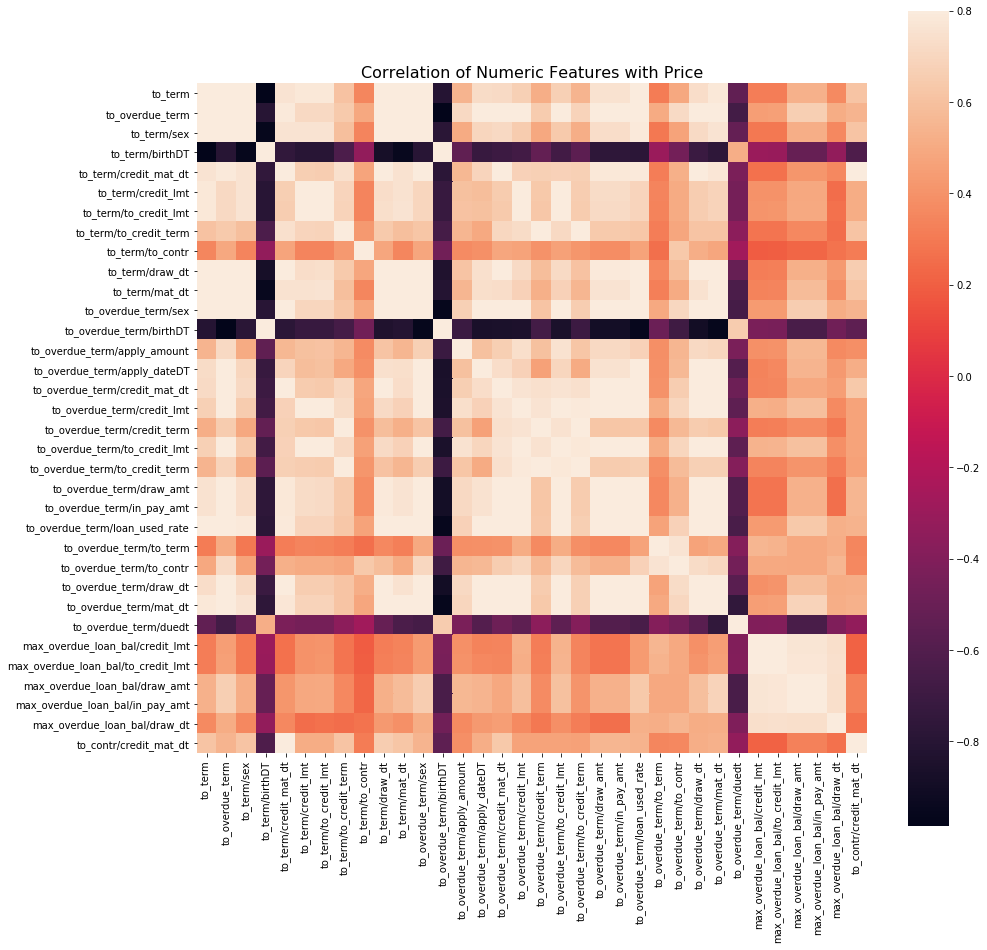

In [352]:
correlation = x_train.corr()
f , ax = plt.subplots(figsize = (15, 15))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

In [1]:
#可视化相关系数
x_train = data_train.drop(['label','cust_id'], axis=1)
data_corr = x_train.corrwith(data_train.label) #计算相关性
result = pd.DataFrame(columns=['features', 'corr'])
result['features'] = data_corr.index
result['corr'] = data_corr.values
data_numeric=data_train.drop(['cust_id'], axis=1)
correlation = data_numeric.corr()
f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

NameError: name 'data_train' is not defined

In [209]:
result.to_excel('./temp1.xlsx',index=False)

In [116]:
#！重点！
#如未做选择特征才需做这个
features = [f for f in data_train.columns if f not in ['cust_id','label'] and '_outliers' not in f]
x_train = data_train[features]
x_test = data_test_a[features]
y_train = data_train['label']

In [137]:
#根据lgb的重要性进行特征选择
features = ['to_overdue_term','credit_lmt','mat_dt','to_term','address','credit_actual_dt','apply_dateDT','apply_amount','sex','to_contr']
x_train = data_train[features]
x_test = data_test_a[features]
y_train = data_train['label']

In [145]:
#根据相关系数进行特征选择
#去除强相关
features = ['to_overdue_term','max_overdue_loan_bal','typeCT','credit_term','credit_mat_dt','to_credit_term','in_pay_amt','to_contr','address','sex']
x_train = data_train[features]
x_test = data_test_a[features]
y_train = data_train['label']

In [143]:
#归一化
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler().fit(x_train)
x_train=minmax_scale.transform(x_train)
x_test=minmax_scale.transform(x_test)

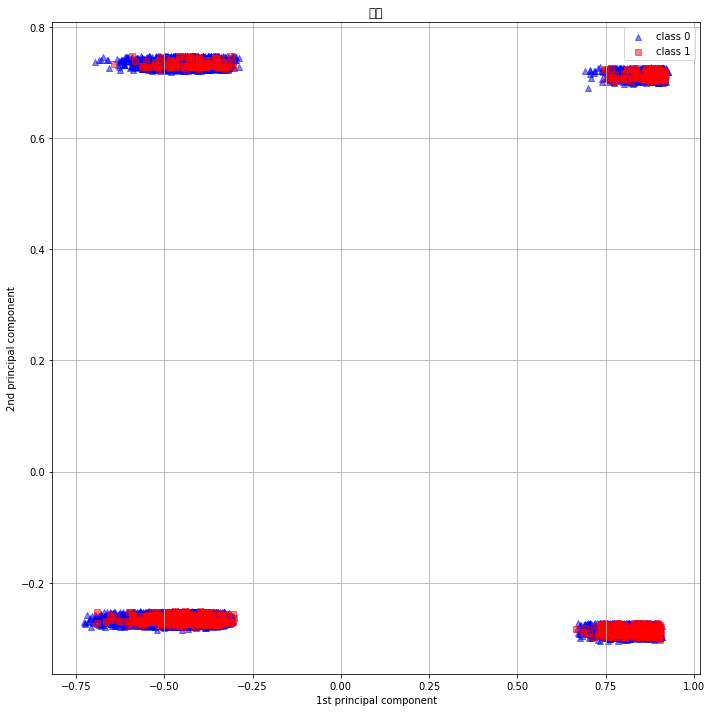

In [144]:
#PCA
from sklearn.decomposition import PCA

# on non-standardized data
pca = PCA(n_components=2).fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)


# om standardized data
# pca_std = PCA(n_components=2).fit(x_train_std)
# x_train_std = pca_std.transform(x_train_std)
# x_test_std = pca_std.transform(x_test_std)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10,10))
for l,c,m in zip((0,1), ('blue', 'red'), ('^', 's')):
    ax1.scatter(x_train[y_train==l, 0], x_train[y_train==l, 1],
        color=c, 
        label='class %s' %l, 
        alpha=0.5,
        marker=m
        )

# for l,c,m in zip((0,1), ('blue', 'red'), ('^', 's')):
#     ax2.scatter(x_train_std[y_train==l, 0], x_train_std[y_train==l, 1],
#         color=c, 
#         label='class %s' %l, 
#         alpha=0.5,
#         marker=m
#         )

ax1.set_title('原图')    
# ax2.set_title('Transformed standardized training dataset after PCA')    
    

ax1.set_xlabel('1st principal component')
ax1.set_ylabel('2nd principal component')
ax1.legend(loc='upper right')
ax1.grid()
plt.tight_layout()
plt.show()  

In [49]:
#建模

In [147]:
# 建模，不做交叉验证
from sklearn.model_selection import KFold
folds = 5
seed = 2020
kf = KFold(n_splits=folds, shuffle=True, random_state=seed)
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,precision_score
import lightgbm as lgb
X_train_split, X_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=0.2)
train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
valid_matrix = lgb.Dataset(X_val, label=y_val)


params = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'learning_rate': 0.1,
                'metric': 'f1',
                'min_child_weight':5.51,
                'num_leaves': 19,
                'min_data_in_leaf': 24,
                'min_split_gain': 0.24,
                'max_depth': 11,
                'reg_lambda': 3,
                'reg_alpha': 1,
                'feature_fraction': 0.50,
                'bagging_fraction': 0.82,
                'bagging_freq': 31,
                'seed': 2020,
                'nthread': 8,
                'silent': True,
                'verbose': -1,
}
def get_f1 (preds,dtrain):
    label=dtrain.get_label()
    preds=np.argmax(preds.reshape(len(label),-1), axis=1)
    f1=f1_score(label,preds,average='weighted')
    return 'f1-score',float(f1),True
model = lgb.train(params, train_set=train_matrix, valid_sets=valid_matrix,feval=get_f1, num_boost_round=20000, verbose_eval=1000,early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1]	valid_0's f1-score: 0.852334


In [148]:
#更进一步的，使用5折交叉验证进行模型性能评估
#不同特征选择的话要改一下iloc
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(x_train, y_train)):
    print('************************************ {} ************************************'.format(str(i+1)))
    X_train_split, y_train_split, X_val, y_val = x_train.iloc[train_index], y_train.iloc[train_index], x_train.iloc[valid_index], y_train.iloc[valid_index]
    
    train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
    valid_matrix = lgb.Dataset(X_val, label=y_val)


    params = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'learning_rate': 0.1,
                'metric': 'f1',
                'min_child_weight': 9.08,
                'num_leaves': 85,
                'min_data_in_leaf': 97,
                'min_split_gain': 0.99,
                'max_depth': 7,
                'reg_lambda': 0,
                'reg_alpha': 2,
                'feature_fraction': 0.69,
                'bagging_fraction': 0.70,
                'bagging_freq': 7,
                'seed': 2020,
                'nthread': 8,
                'silent': True,
                'verbose': -1,
    }
    
    model = lgb.train(params, train_set=train_matrix, num_boost_round=20000,feval=get_f1, valid_sets=valid_matrix, verbose_eval=1000, early_stopping_rounds=200)
    val_pred = model.predict(X_val, num_iteration=model.best_iteration)
    
#     cv_scores.append(f1_score(y_val, val_pred))
#     print(cv_scores)

# print("lgb_scotrainre_list:{}".format(cv_scores))
# print("lgb_score_mean:{}".format(np.mean(cv_scores)))
# print("lgb_score_std:{}".format(np.std(cv_scores)))

************************************ 1 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1]	valid_0's f1-score: 0.828638
************************************ 2 ************************************
[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1]	valid_0's f1-score: 0.855308
************************************ 3 ************************************
[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1]	valid_0's f1-score: 0.848621
************************************ 4 ************************************
[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1]	valid_0's f1-score: 0.869464
***********************************

In [309]:
x_test.shape

(5000, 10)

column  importance
6            in_pay_amt           4
3           credit_term           3
2                typeCT           2
1  max_overdue_loan_bal           1
7              to_contr           1
0       to_overdue_term           0
4         credit_mat_dt           0
5        to_credit_term           0
8               address           0
9                   sex           0


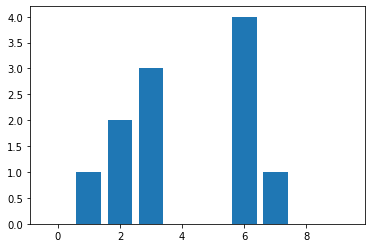

In [149]:
#输出重要性
print(pd.DataFrame({
        'column': features,
        'importance': model.feature_importance(),
}).sort_values(by='importance',ascending=False))
plt.bar(range(len(model.feature_importance())), model.feature_importance())
plt.show()

In [60]:
preds = model.predict(x_test, num_iteration=model.best_iteration)
preds=pd.Series(preds)
for i in range(preds.shape[0]):
    if preds[i] > 0.096:
        preds[i] = 1
    else:
        preds[i] = 0
print(preds.value_counts())



0.0    2918
1.0    2082
dtype: int64


In [61]:
data_test_a['label']=preds
data_test_a.head()
data_test_a[['cust_id','label']].to_excel('./result.xlsx',index=False)

In [318]:
preds = model.predict(x_test, num_iteration=model.best_iteration)
label_result = pd.read_csv('label.csv')
for j in range(1,500):
    lgb_test_copy = np.zeros((5000,))
    for i in range(preds.shape[0]):
        if preds[i] > 0.001*j:
            lgb_test_copy[i] = 1
        else:
            lgb_test_copy[i] = 0
        # if i<500 :
        #     print(i," ",lgb_test[i]," ",lgb_test_copy[i])
    #s = f1_score(label_result['label'].values, lgb_test_copy)
    print(0.001*j,pd.Series(lgb_test_copy).value_counts())

0.001 1.0    5000
dtype: int64
0.002 1.0    5000
dtype: int64
0.003 1.0    5000
dtype: int64
0.004 1.0    5000
dtype: int64
0.005 1.0    5000
dtype: int64
0.006 1.0    5000
dtype: int64
0.007 1.0    5000
dtype: int64
0.008 1.0    5000
dtype: int64
0.009000000000000001 1.0    5000
dtype: int64
0.01 1.0    5000
dtype: int64
0.011 1.0    5000
dtype: int64
0.012 1.0    5000
dtype: int64
0.013000000000000001 1.0    5000
dtype: int64
0.014 1.0    5000
dtype: int64
0.015 1.0    5000
dtype: int64
0.016 1.0    5000
dtype: int64
0.017 1.0    5000
dtype: int64
0.018000000000000002 1.0    5000
dtype: int64
0.019 1.0    5000
dtype: int64
0.02 1.0    5000
dtype: int64
0.021 1.0    5000
dtype: int64
0.022 1.0    5000
dtype: int64
0.023 1.0    5000
dtype: int64
0.024 1.0    5000
dtype: int64
0.025 1.0    5000
dtype: int64
0.026000000000000002 1.0    5000
dtype: int64
0.027 1.0    5000
dtype: int64
0.028 1.0    5000
dtype: int64
0.029 1.0    5000
dtype: int64
0.03 1.0    5000
dtype: int64
0.031 1.0    

In [128]:
#贝叶斯调参
from sklearn.model_selection import cross_val_score

"""定义优化函数"""
def rf_cv_lgb(num_leaves, max_depth, bagging_fraction, feature_fraction, bagging_freq, min_data_in_leaf, 
              min_child_weight, min_split_gain, reg_lambda, reg_alpha):
    # 建立模型
    model_lgb = lgb.LGBMClassifier(boosting_type='gbdt', bjective='binary', metric='f1',
                                   learning_rate=0.1, n_estimators=5000,
                                   num_leaves=int(num_leaves), max_depth=int(max_depth), 
                                   bagging_fraction=round(bagging_fraction, 2), feature_fraction=round(feature_fraction, 2),
                                   bagging_freq=int(bagging_freq), min_data_in_leaf=int(min_data_in_leaf),
                                   min_child_weight=min_child_weight, min_split_gain=min_split_gain,
                                   reg_lambda=reg_lambda, reg_alpha=reg_alpha,
                                   n_jobs= 8
                                  )
    
    val = cross_val_score(model_lgb, X_train_split, y_train_split, cv=5, scoring='f1').mean()
    
    return val

In [129]:
from bayes_opt import BayesianOptimization
"""定义优化参数"""
bayes_lgb = BayesianOptimization(
    rf_cv_lgb, 
    {
        'num_leaves':(10, 200),
        'max_depth':(3, 20),
        'bagging_fraction':(0.5, 1.0),
        'feature_fraction':(0.5, 1.0),
        'bagging_freq':(0, 100),
        'min_data_in_leaf':(10,100),
        'min_child_weight':(0, 10),
        'min_split_gain':(0.0, 1.0),
        'reg_alpha':(0.0, 10),
        'reg_lambda':(0.0, 10),
    }
)

"""开始优化"""
bayes_lgb.maximize(n_iter=10)

ild_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] bagging_fraction is set=0.74, subsample=1.0 will be ignored. Current value: bagging_fraction=0.74
[LightGBM] [Warning] bagging_freq is set=85, subsample_freq=0 will be ignored. Current value: bagging_freq=85
[LightGBM] [Warning] Unknown parameter: bjective
[LightGBM] [Warning] feature_fraction is set=0.96, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.96
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] bagging_fraction is set=0.74, subsample=1.0 will be ignored. Current value: bagging_fraction=0.74
[LightGBM] [Warning] bagging_freq is set=85, subsample_freq=0 will be ignored. Current value: bagging_freq=85
[LightGBM] [Warning] Unknown parameter: bjective
[LightGBM] [Warning] feature_fraction is set=0.96, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.96
[Li

In [405]:
bayes_lgb.max

{'target': 0.34047093212827273,
 'params': {'bagging_fraction': 0.5025494382528702,
  'bagging_freq': 31.54057875610896,
  'feature_fraction': 0.8201269713152332,
  'max_depth': 11.717549241010108,
  'min_child_weight': 5.518294452733311,
  'min_data_in_leaf': 24.67084265170398,
  'min_split_gain': 0.24751518911929615,
  'num_leaves': 19.263179458439964,
  'reg_alpha': 1.0221772770207593,
  'reg_lambda': 3.2430432323336245}}

In [59]:
#剪枝
new_matrix = lgb.Dataset(x_train, label=y_train)
cv_result_lgb = lgb.cv(
    train_set=new_matrix,
    early_stopping_rounds=1000, 
    num_boost_round=20000,
    nfold=5,
    stratified=True,
    shuffle=True,
    params=params,
    metrics='auc',
    seed=0
)
print('迭代次数{}'.format(len(cv_result_lgb['auc-mean'])))
print('最终模型的AUC为{}'.format(max(cv_result_lgb['auc-mean'])))

[LightGBM] [Warning] Unknown parameter: silent
迭代次数33
最终模型的AUC为0.733298611111111
